# Imports and Setup

In [13]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew
import cv2
import os
from collections import defaultdict
import re
import pickle
from pathlib import Path
import git

import warnings
warnings.filterwarnings("ignore")

ROOT_DIR =  Path(git.Repo('.', search_parent_directories=True).working_tree_dir)
plots_path = os.path.join(ROOT_DIR, "publication", "paper", "draft_plots")
SAVE_FIGS=True

# Visualizing Raw Filters

In [14]:
np.random.seed(0)

# Load pretrained AlexNet
alexnet = torchvision.models.alexnet(pretrained=True)
alexnet.eval()  # set to evaluation mode

# Extract the first convolutional layer filters
first_conv = alexnet.features[0]
filters = first_conv.weight.data.clone().cpu().numpy()  # shape: [out_channels, in_channels, height, width]

print("First layer filters shape:", filters.shape)

First layer filters shape: (64, 3, 11, 11)


In [15]:
#filter groupings
filter_groups = {
    "single edge": [3, 6, 10, 11, 12, 13, 14, 23, 24, 28, 29, 30, 32, 34, 43, 48, 49, 50, 55, 57], #gabor-like / edge detector
    "multi edge": [9, 16, 18, 22, 25, 27, 33, 41, 54, 63], #complex gabor / complex edge detector
    "eye": [21, 31, 37, 39, 45, 46,], # color contrast
    "dual color": [0, 2, 4, 5, 17, 20, 26, 38, 42, 44, 47, 56, 59], # color contrast
    "inside out": [7, 15, 19, 35, 40, 51, 52, 53, 58], # smoothing
    "misc": [1, 8, 36, 60, 61, 62] # misc
}

sum([len(i) for i in filter_groups.values()])

64

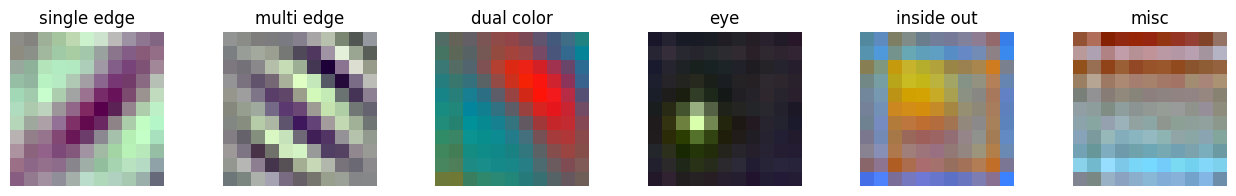

In [18]:
# Specify the filters to display
selected_filters = [6, 16, 2, 31, 52, 62]

# Create a single row for the selected filters
num_filters = len(selected_filters)
rows = 1

fig, axes = plt.subplots(rows, num_filters, figsize=(16, rows * 2))
axes = axes.flatten()

for i, idx in enumerate(selected_filters):
    # Find the category of the filter
    group = next((key for key, indices in filter_groups.items() if idx in indices), "Unknown")
    
    filt = filters[idx]  # Shape: (3, 11, 11)

    # Normalize filter for visualization
    filt = (filt - filt.min()) / (filt.max() - filt.min())  # Normalize to [0,1]
    
    # Convert to RGB image format
    filt = filt.transpose(1, 2, 0)  # (3, 11, 11) -> (11, 11, 3)
    
    axes[i].imshow(filt)
    axes[i].set_title(f"{group}", fontsize=12)
    axes[i].axis("off")

# plt.subplots_adjust()  # Adjust horizontal space between columns
plt.show()

if SAVE_FIGS:
    save_path = os.path.join(plots_path, "learned_filters_subset.jpg")
    fig.savefig(save_path, dpi=200, bbox_inches='tight')


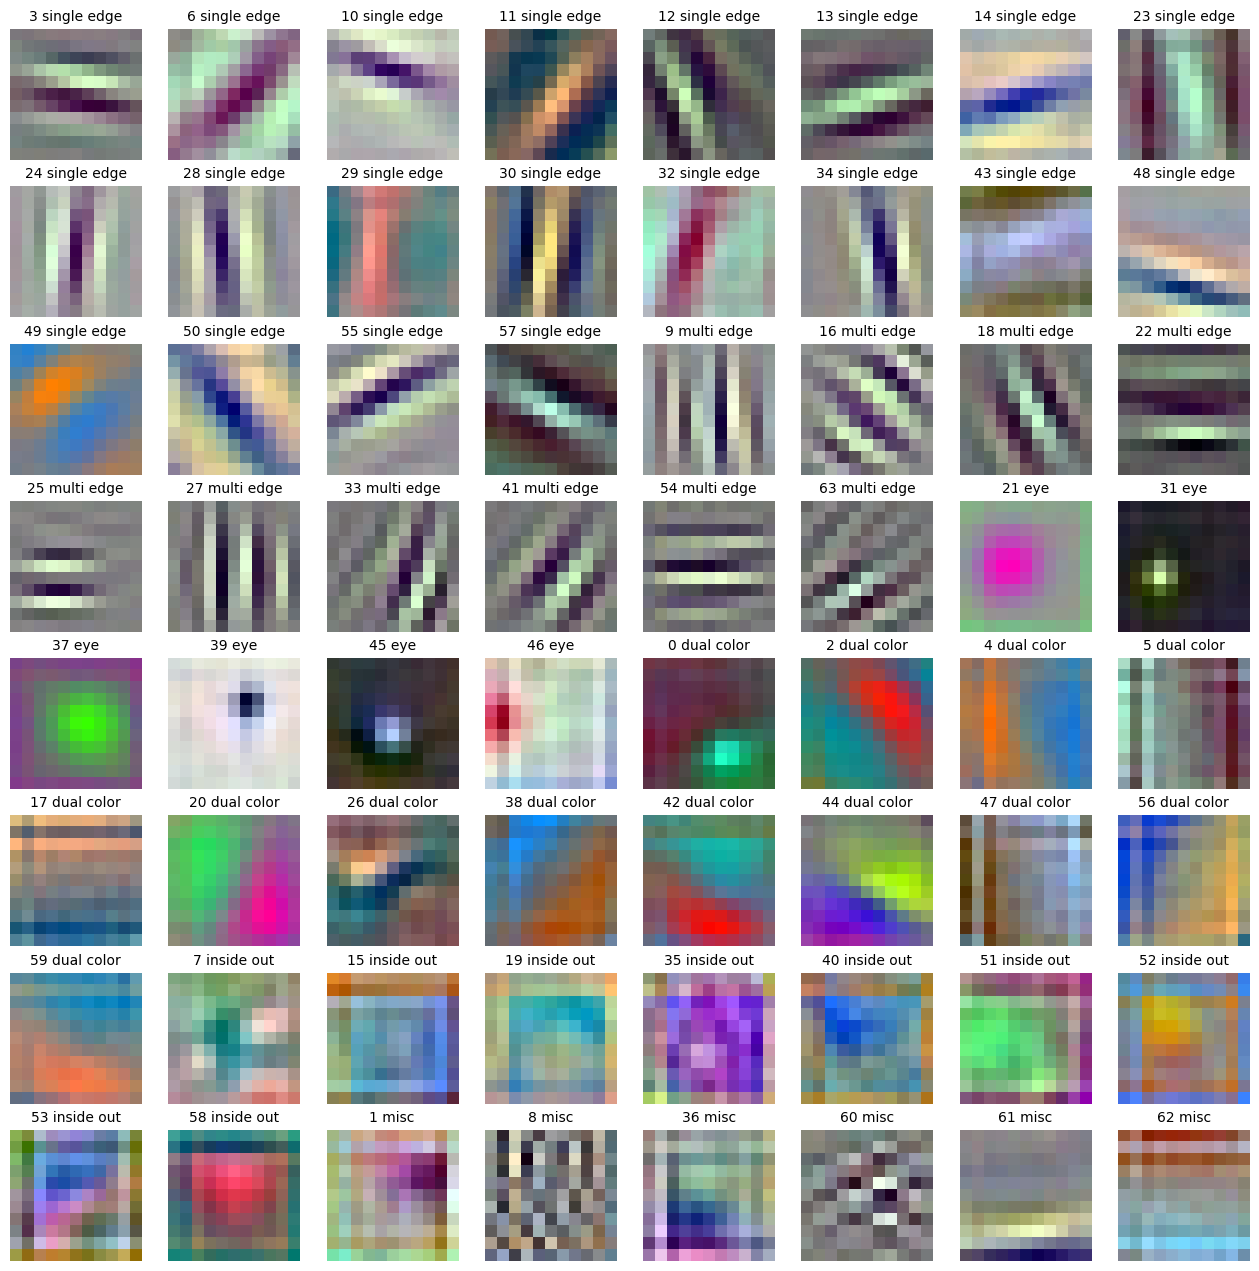

In [17]:
num_filters = 64
rows = int(np.ceil(num_filters / 8))

fig, axes = plt.subplots(rows, 8, figsize=(16, rows * 2))
axes = axes.flatten()

i = 0
for group, indices in filter_groups.items():
    for idx in indices:
        filt = filters[idx]  # Shape: (3, 11, 11)

        # Normalize filter for visualization
        filt = (filt - filt.min()) / (filt.max() - filt.min())  # Normalize to [0,1]
        
        # Convert to RGB image format
        filt = filt.transpose(1, 2, 0)  # (3, 11, 11) -> (11, 11, 3)
        
        axes[i].imshow(filt)
        axes[i].set_title(f"{idx} {group}", fontsize=10)
        axes[i].axis("off")
        i += 1

plt.subplots_adjust()  # Adjust horizontal space between columns
plt.show()

if SAVE_FIGS:
    save_path = os.path.join(plots_path, "learned_filters_panel.jpg")
    fig.savefig(save_path, dpi=100, bbox_inches='tight')
